## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units = 512, activation='relu')(input_layer)
    x = keras.layers.Dense(units = 256, activation='relu')(x)
    x = keras.layers.Dense(units = 128, activation='relu')(x)
    out = keras.layers.Dense(units = 10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    return model

model = build_mlp()

In [11]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 46s 912us/step - loss: 1.7615 - acc: 0.3794 - val_loss: 1.7551 - val_acc: 0.3846
Epoch 2/500
50000/50000 [==============================] - 29s 579us/step - loss: 1.7490 - acc: 0.3846 - val_loss: 1.7475 - val_acc: 0.3882
Epoch 3/500
50000/50000 [==============================] - 31s 616us/step - loss: 1.7432 - acc: 0.3851 - val_loss: 1.7433 - val_acc: 0.3877
Epoch 4/500
50000/50000 [==============================] - 32s 637us/step - loss: 1.7391 - acc: 0.3863 - val_loss: 1.7396 - val_acc: 0.3877
Epoch 5/500
50000/50000 [==============================] - 25s 505us/step - loss: 1.7357 - acc: 0.3868 - val_loss: 1.7367 - val_acc: 0.3879
Epoch 6/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.7328 - acc: 0.3873 - val_loss: 1.7341 - val_acc: 0.3899
Epoch 7/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.7302 - acc: 0.3881 - val_l

50000/50000 [==============================] - 10s 206us/step - loss: 1.6580 - acc: 0.4132 - val_loss: 1.6606 - val_acc: 0.4124
Epoch 59/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.6569 - acc: 0.4140 - val_loss: 1.6591 - val_acc: 0.4118
Epoch 60/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.6558 - acc: 0.4140 - val_loss: 1.6587 - val_acc: 0.4125
Epoch 61/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.6547 - acc: 0.4156 - val_loss: 1.6569 - val_acc: 0.4129
Epoch 62/500
50000/50000 [==============================] - 13s 260us/step - loss: 1.6537 - acc: 0.4153 - val_loss: 1.6558 - val_acc: 0.4133
Epoch 63/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.6527 - acc: 0.4159 - val_loss: 1.6552 - val_acc: 0.4144
Epoch 64/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.6515 - acc: 0.4166 - val_loss: 1.6542 - val_acc: 0.4145
Epoch 65/500
50000/50000 [

50000/50000 [==============================] - 10s 209us/step - loss: 1.6043 - acc: 0.4336 - val_loss: 1.6108 - val_acc: 0.4312
Epoch 117/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.6035 - acc: 0.4348 - val_loss: 1.6102 - val_acc: 0.4335
Epoch 118/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.6026 - acc: 0.4338 - val_loss: 1.6097 - val_acc: 0.4314
Epoch 119/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.6020 - acc: 0.4354 - val_loss: 1.6094 - val_acc: 0.4311
Epoch 120/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.6011 - acc: 0.4347 - val_loss: 1.6082 - val_acc: 0.4311
Epoch 121/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.6004 - acc: 0.4347 - val_loss: 1.6069 - val_acc: 0.4326
Epoch 122/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.5996 - acc: 0.4351 - val_loss: 1.6075 - val_acc: 0.4320
Epoch 123/500
50000/

50000/50000 [==============================] - 11s 223us/step - loss: 1.5628 - acc: 0.4486 - val_loss: 1.5754 - val_acc: 0.4444
Epoch 174/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.5622 - acc: 0.4488 - val_loss: 1.5741 - val_acc: 0.4436
Epoch 175/500
50000/50000 [==============================] - 11s 210us/step - loss: 1.5614 - acc: 0.4502 - val_loss: 1.5745 - val_acc: 0.4446
Epoch 176/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.5608 - acc: 0.4490 - val_loss: 1.5741 - val_acc: 0.4458
Epoch 177/500
50000/50000 [==============================] - 11s 210us/step - loss: 1.5602 - acc: 0.4490 - val_loss: 1.5725 - val_acc: 0.4449
Epoch 178/500
50000/50000 [==============================] - 11s 220us/step - loss: 1.5595 - acc: 0.4501 - val_loss: 1.5730 - val_acc: 0.4457
Epoch 179/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.5589 - acc: 0.4497 - val_loss: 1.5752 - val_acc: 0.4434
Epoch 180/500
50000/

50000/50000 [==============================] - 30s 598us/step - loss: 1.5257 - acc: 0.4616 - val_loss: 1.5453 - val_acc: 0.4563
Epoch 231/500
50000/50000 [==============================] - 22s 438us/step - loss: 1.5253 - acc: 0.4628 - val_loss: 1.5448 - val_acc: 0.4568
Epoch 232/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.5246 - acc: 0.4626 - val_loss: 1.5450 - val_acc: 0.4590
Epoch 233/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.5240 - acc: 0.4625 - val_loss: 1.5451 - val_acc: 0.4572
Epoch 234/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.5234 - acc: 0.4624 - val_loss: 1.5447 - val_acc: 0.4571
Epoch 235/500
50000/50000 [==============================] - 11s 221us/step - loss: 1.5227 - acc: 0.4638 - val_loss: 1.5448 - val_acc: 0.4566
Epoch 236/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.5223 - acc: 0.4643 - val_loss: 1.5418 - val_acc: 0.4586
Epoch 237/500
50000/

50000/50000 [==============================] - 41s 821us/step - loss: 1.4914 - acc: 0.4752 - val_loss: 1.5180 - val_acc: 0.4672
Epoch 288/500
50000/50000 [==============================] - 36s 715us/step - loss: 1.4910 - acc: 0.4745 - val_loss: 1.5169 - val_acc: 0.4673
Epoch 289/500
50000/50000 [==============================] - 33s 657us/step - loss: 1.4901 - acc: 0.4745 - val_loss: 1.5175 - val_acc: 0.4663
Epoch 290/500
50000/50000 [==============================] - 31s 614us/step - loss: 1.4897 - acc: 0.4751 - val_loss: 1.5175 - val_acc: 0.4666
Epoch 291/500
50000/50000 [==============================] - 31s 629us/step - loss: 1.4893 - acc: 0.4754 - val_loss: 1.5189 - val_acc: 0.4686
Epoch 292/500
50000/50000 [==============================] - 29s 587us/step - loss: 1.4886 - acc: 0.4750 - val_loss: 1.5162 - val_acc: 0.4699
Epoch 293/500
50000/50000 [==============================] - 29s 588us/step - loss: 1.4879 - acc: 0.4749 - val_loss: 1.5152 - val_acc: 0.4684
Epoch 294/500
50000/

Epoch 345/500
50000/50000 [==============================] - 23s 450us/step - loss: 1.4586 - acc: 0.4851 - val_loss: 1.4926 - val_acc: 0.4751
Epoch 346/500
50000/50000 [==============================] - 20s 400us/step - loss: 1.4577 - acc: 0.4858 - val_loss: 1.4928 - val_acc: 0.4750
Epoch 347/500
50000/50000 [==============================] - 20s 393us/step - loss: 1.4573 - acc: 0.4846 - val_loss: 1.4915 - val_acc: 0.4763
Epoch 348/500
50000/50000 [==============================] - 19s 383us/step - loss: 1.4566 - acc: 0.4854 - val_loss: 1.4936 - val_acc: 0.4727
Epoch 349/500
50000/50000 [==============================] - 20s 409us/step - loss: 1.4560 - acc: 0.4864 - val_loss: 1.4918 - val_acc: 0.4750
Epoch 350/500
50000/50000 [==============================] - 16s 313us/step - loss: 1.4554 - acc: 0.4854 - val_loss: 1.4914 - val_acc: 0.4767
Epoch 351/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.4550 - acc: 0.4854 - val_loss: 1.4918 - val_acc: 0.4740
Epoch 

Epoch 403/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.4255 - acc: 0.4964 - val_loss: 1.4709 - val_acc: 0.4825
Epoch 404/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.4249 - acc: 0.4960 - val_loss: 1.4736 - val_acc: 0.4810
Epoch 405/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.4241 - acc: 0.4964 - val_loss: 1.4714 - val_acc: 0.4817
Epoch 406/500
50000/50000 [==============================] - 14s 277us/step - loss: 1.4236 - acc: 0.4974 - val_loss: 1.4700 - val_acc: 0.4825
Epoch 407/500
50000/50000 [==============================] - 13s 250us/step - loss: 1.4229 - acc: 0.4969 - val_loss: 1.4706 - val_acc: 0.4813
Epoch 408/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.4226 - acc: 0.4980 - val_loss: 1.4695 - val_acc: 0.4839
Epoch 409/500
50000/50000 [==============================] - 13s 262us/step - loss: 1.4224 - acc: 0.4971 - val_loss: 1.4721 - val_acc: 0.4813
Epoch 

Epoch 461/500
50000/50000 [==============================] - 38s 760us/step - loss: 1.3934 - acc: 0.5082 - val_loss: 1.4523 - val_acc: 0.4867
Epoch 462/500
50000/50000 [==============================] - 32s 637us/step - loss: 1.3930 - acc: 0.5076 - val_loss: 1.4508 - val_acc: 0.4876
Epoch 463/500
50000/50000 [==============================] - 38s 751us/step - loss: 1.3924 - acc: 0.5082 - val_loss: 1.4496 - val_acc: 0.4888
Epoch 464/500
50000/50000 [==============================] - 44s 880us/step - loss: 1.3919 - acc: 0.5079 - val_loss: 1.4488 - val_acc: 0.4887
Epoch 465/500
50000/50000 [==============================] - 44s 870us/step - loss: 1.3916 - acc: 0.5080 - val_loss: 1.4510 - val_acc: 0.4883
Epoch 466/500
50000/50000 [==============================] - 27s 543us/step - loss: 1.3910 - acc: 0.5081 - val_loss: 1.4499 - val_acc: 0.4901
Epoch 467/500
50000/50000 [==============================] - 25s 499us/step - loss: 1.3905 - acc: 0.5081 - val_loss: 1.4467 - val_acc: 0.4887
Epoch 

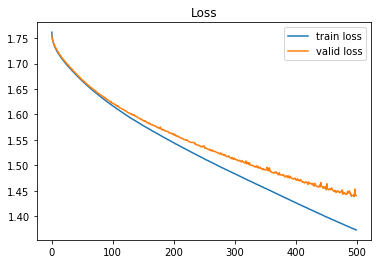

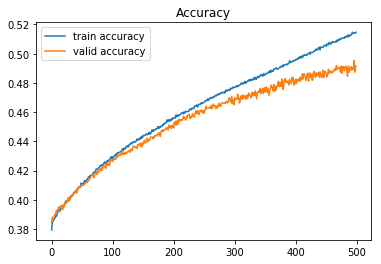

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()